In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [41]:
X_train = X_train_full[:50000] / 255
y_train = y_train_full[:50000]

X_val = X_train_full[50000:] / 255
y_val = y_train_full[50000:]

X_test = X_test / 255

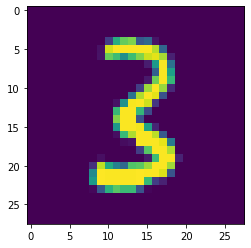

In [42]:
plt.imshow(X_val[0])

In [119]:
tf.random.set_seed(42)
np.random.seed(42)

dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.GaussianNoise(0.1),
    keras.layers.Dense(200, activation = "selu"),
    keras.layers.Dense(100, activation = "selu"),
    keras.layers.Dense(30, activation = "selu")
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(200, activation = "selu", input_shape=[30]),
    keras.layers.Dense(100, activation = "selu"),
    keras.layers.Dense(28*28, activation = "sigmoid"),
    keras.layers.Reshape([28,28])
])

dropout_autoencoder = keras.models.Sequential([dropout_encoder, dropout_decoder])

dropout_autoencoder.compile(loss = "binary_crossentropy",metrics=["mse"], optimizer = keras.optimizers.SGD(learning_rate = 0.1))

In [120]:
dropout_encoder.summary()
dropout_decoder.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 gaussian_noise_7 (GaussianN  (None, 784)              0         
 oise)                                                           
                                                                 
 dense_65 (Dense)            (None, 200)               157000    
                                                                 
 dense_66 (Dense)            (None, 100)               20100     
                                                                 
 dense_67 (Dense)            (None, 30)                3030      
                                                                 
Total params: 180,130
Trainable params: 180,130
Non-trainable params: 0
_______________________________________________

In [121]:
earlystop = keras.callbacks.EarlyStopping(monitor= "val_loss", patience = 5)

In [122]:
history = dropout_autoencoder.fit(X_train, X_train, validation_data = (X_val, X_val), epochs = 200, callbacks = [earlystop])

Epoch 1/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2914 - mse: 0.0768 - val_loss: 0.2472 - val_mse: 0.0614
Epoch 2/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2337 - mse: 0.0566 - val_loss: 0.2171 - val_mse: 0.0507
Epoch 3/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2072 - mse: 0.0474 - val_loss: 0.1949 - val_mse: 0.0433
Epoch 4/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1881 - mse: 0.0411 - val_loss: 0.1791 - val_mse: 0.0380
Epoch 5/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1755 - mse: 0.0369 - val_loss: 0.1694 - val_mse: 0.0348
Epoch 6/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1671 - mse: 0.0341 - val_loss: 0.1621 - val_mse: 0.0324
Epoch 7/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1605 - mse: 0.0320 - val_loss: 0.1563 - val_mse: 0.0306
Epoch 8/200
1563/1563 [==============================] 

1563/1563 [==============================] - 5s 4ms/step - loss: 0.1102 - mse: 0.0157 - val_loss: 0.1086 - val_mse: 0.0151
Epoch 62/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1100 - mse: 0.0156 - val_loss: 0.1084 - val_mse: 0.0150
Epoch 63/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1097 - mse: 0.0156 - val_loss: 0.1083 - val_mse: 0.0150
Epoch 64/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1095 - mse: 0.0155 - val_loss: 0.1080 - val_mse: 0.0149
Epoch 65/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1093 - mse: 0.0154 - val_loss: 0.1078 - val_mse: 0.0149
Epoch 66/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1091 - mse: 0.0153 - val_loss: 0.1078 - val_mse: 0.0148
Epoch 67/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1088 - mse: 0.0153 - val_loss: 0.1073 - val_mse: 0.0147
Epoch 68/200
1563/1563 [==============================] - 6s 

1563/1563 [==============================] - 6s 4ms/step - loss: 0.1016 - mse: 0.0129 - val_loss: 0.1002 - val_mse: 0.0124
Epoch 122/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1015 - mse: 0.0129 - val_loss: 0.1001 - val_mse: 0.0123
Epoch 123/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1014 - mse: 0.0129 - val_loss: 0.0998 - val_mse: 0.0122
Epoch 124/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1012 - mse: 0.0128 - val_loss: 0.0997 - val_mse: 0.0122
Epoch 125/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1011 - mse: 0.0128 - val_loss: 0.0996 - val_mse: 0.0122
Epoch 126/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1010 - mse: 0.0127 - val_loss: 0.0995 - val_mse: 0.0121
Epoch 127/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1009 - mse: 0.0127 - val_loss: 0.0993 - val_mse: 0.0121
Epoch 128/200
1563/1563 [==============================

Epoch 181/200
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0975 - mse: 0.0116 - val_loss: 0.0961 - val_mse: 0.0110
Epoch 182/200
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0975 - mse: 0.0116 - val_loss: 0.0964 - val_mse: 0.0111
Epoch 183/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0974 - mse: 0.0116 - val_loss: 0.0960 - val_mse: 0.0110
Epoch 184/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0973 - mse: 0.0116 - val_loss: 0.0959 - val_mse: 0.0110
Epoch 185/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0972 - mse: 0.0115 - val_loss: 0.0962 - val_mse: 0.0111
Epoch 186/200
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0972 - mse: 0.0115 - val_loss: 0.0956 - val_mse: 0.0109
Epoch 187/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0971 - mse: 0.0115 - val_loss: 0.0956 - val_mse: 0.0109
Epoch 188/200
1563/1563 [================

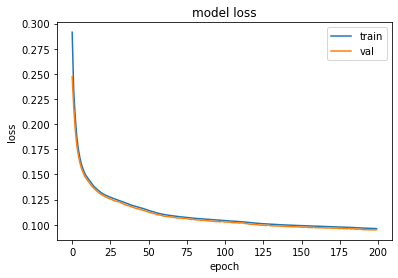

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

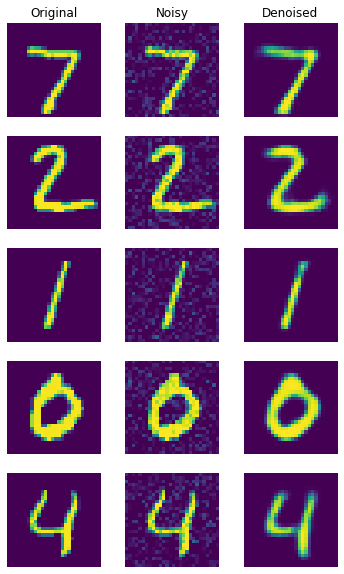

In [124]:
n_images = 5
new_images = X_test[:n_images]
new_images_noisy = new_images + np.random.randn(n_images, 28, 28) * 0.1
new_images_denoised = dropout_autoencoder.predict(new_images_noisy)

plt.figure(figsize=(6, n_images * 2))
for index in range(n_images):
    plt.subplot(n_images, 3, index * 3 + 1)
    plt.imshow(new_images[index])
    plt.axis('off')
    if index == 0:
        plt.title("Original")
    plt.subplot(n_images, 3, index * 3 + 2)
    plt.imshow(np.clip(new_images_noisy[index], 0., 1.))
    plt.axis('off')
    if index == 0:
        plt.title("Noisy")
    plt.subplot(n_images, 3, index * 3 + 3)
    plt.imshow(new_images_denoised[index])
    plt.axis('off')
    if index == 0:
        plt.title("Denoised")
plt.show()